In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [ ]:
 import pandas as pd
data = pd.read_csv('/content/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
y = data['label']
x = data.drop(columns = ['label'])
y= y.fillna(y.median())
y

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    6
Name: label, Length: 10015, dtype: int64

In [ ]:
tabular_data = pd.read_csv('/content/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'back'),
  Text(1, 0, 'lower extremity'),
  Text(2, 0, 'trunk'),
  Text(3, 0, 'upper extremity'),
  Text(4, 0, 'abdomen'),
  Text(5, 0, 'face'),
  Text(6, 0, 'chest'),
  Text(7, 0, 'foot'),
  Text(8, 0, 'scalp'),
  Text(9, 0, 'neck'),
  Text(10, 0, 'unknown'),
  Text(11, 0, 'hand'),
  Text(12, 0, 'genital'),
  Text(13, 0, 'ear'),
  Text(14, 0, 'acral')])

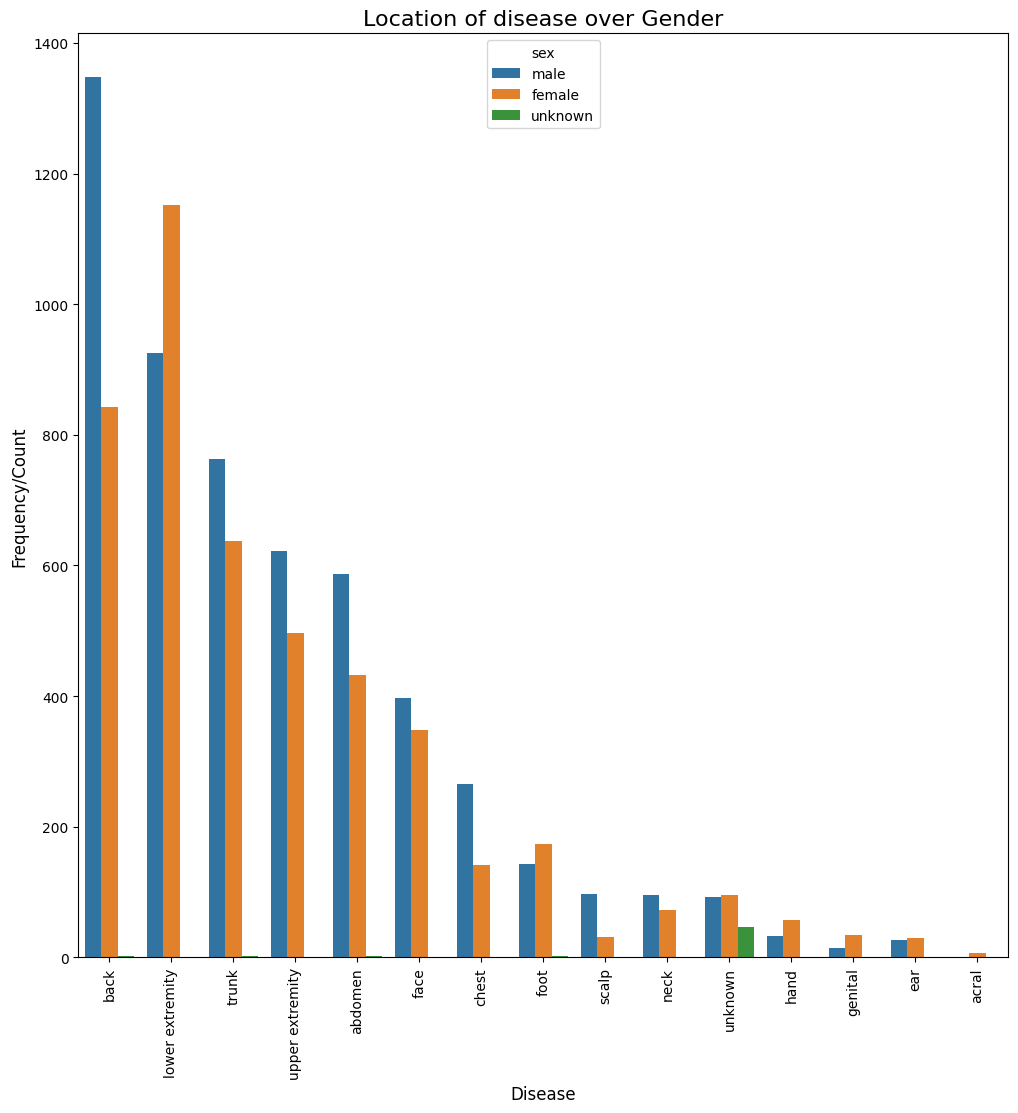

In [ ]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [ ]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [ ]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [ ]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 20,
                    callbacks=[callback])

Epoch 1/20
235/235 [==============================] - ETA: 0s - loss: 1.2528 - accuracy: 0.5092
Epoch 1: saving model to best_model.h5
235/235 [==============================] - 15s 12ms/step - loss: 1.2528 - accuracy: 0.5092 - val_loss: 0.8994 - val_accuracy: 0.6601
Epoch 2/20
 17/235 [=>............................] - ETA: 1s - loss: 0.8278 - accuracy: 0.7096

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


228/235 [============================>.] - ETA: 0s - loss: 0.6695 - accuracy: 0.7536
Epoch 2: saving model to best_model.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.6652 - accuracy: 0.7551 - val_loss: 0.5263 - val_accuracy: 0.8068
Epoch 3/20
233/235 [============================>.] - ETA: 0s - loss: 0.4167 - accuracy: 0.8491
Epoch 3: saving model to best_model.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.4157 - accuracy: 0.8497 - val_loss: 0.3877 - val_accuracy: 0.8586
Epoch 4/20
229/235 [============================>.] - ETA: 0s - loss: 0.2924 - accuracy: 0.8914
Epoch 4: saving model to best_model.h5
235/235 [==============================] - 2s 8ms/step - loss: 0.2920 - accuracy: 0.8916 - val_loss: 0.2761 - val_accuracy: 0.9021
Epoch 5/20
229/235 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.9170
Epoch 5: saving model to best_model.h5
235/235 [==============================] - 2s 7ms/step - loss: 0.2254 - accura

In [ ]:
model.evaluate(X_test, Y_test, verbose=1)
pred=model.predict(X_test)
categories=['Melanocytic nevi','Melanoma','Benign keratosis-like lesions','Basal cell carcinoma','Actinic keratoses','Vascular lesions','Dermatofibroma']

294/294 [==============================] - 1s 2ms/step


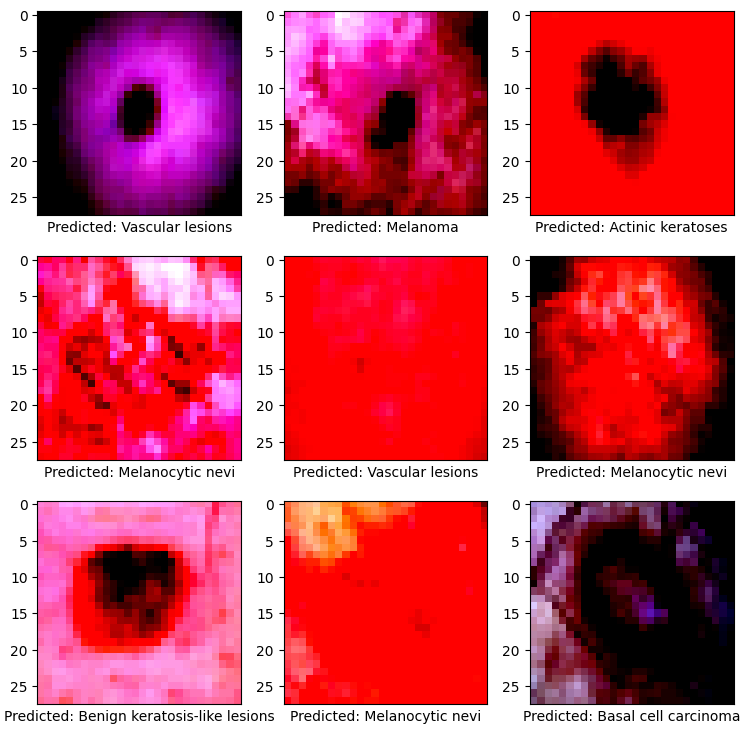

In [ ]:

# Assuming 'pred' contains the predicted class probabilities for each image in X_test

# Create a figure with subplots to display the predicted images
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    # Display the image (assuming it's already normalized)
    plt.imshow(X_test[i])

    # Get the predicted class index (argmax)
    predicted_class_index = np.argmax(pred[i])

    # Get the predicted class label from 'categories'
    predicted_class_label = categories[predicted_class_index]

    # Set the xlabel with the predicted label
    plt.xlabel("Predicted: " + predicted_class_label)

    # Remove x-axis ticks
    plt.xticks([])

# Display the figure with subplots
plt.show()
